# INTERNSHIP GRIP (November2022): The Sparks Foundation 

## Data Science and Business Analytics Internship


### Author: Abhay Kulkarni


# Task 2: Unsupervised Learning (K Means Clustering) - Iris Dataset

### We will predict the optimum number of clusters in the Iris dataset and represent it visually.

# Table of Contents
      1. Importing the required libraries
      2. Importing the dataset: Reading and Preparing Data 
      3. Visualizing the dataset
      4. Methods to find the optimal number of clusters
      5. Applying the kmeans model on the dataset
      6. Visualizing the clusters

# 1. Importing the required libraries

In [41]:
# Data manipulation, reading and writing data, 
import pandas as pd
# NUMERICAL COMPUTING TOOLS,  ARRAYS management
import numpy as np  
# PLOTTING
import matplotlib.pyplot as plt
 
# All functions related to K means (number of k determination and kmeans model application)
from sklearn.cluster import KMeans

# Import ElbowVisualizer to number of k determination
from yellowbrick.cluster import KElbowVisualizer

import plotly.express as px

# data  plot/ visualization
import seaborn as sns

#implements several loss, score, and utility functions to measure classification performance
import sklearn.metrics as sm


# manually add a legend 
import matplotlib.patches as mpatches

# 2. Importing the dataset:

In [42]:
iris_data = pd.read_csv('https://raw.githubusercontent.com/kayabhay/The-Sparks-Foundation/main/Dataset/Iris.csv')

In [43]:
# Visualice a sample of the data
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [44]:
# Checking for missing values

iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [45]:
# Data descriptors

iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [46]:
# Data info

iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [47]:
# To extract the attributes SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm


x = iris_data.iloc[:,[1,2,3,4]].values

In [48]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

# 3. Visualizing the dataset:

## How many clusters or groups of Iris data we can find?

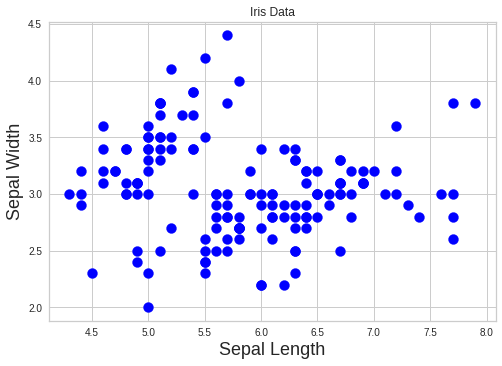

In [49]:
plt.scatter(x[:,0],x[:,1], s=100, c='blue') 
plt.title('Iris Data')
plt.xlabel('Sepal Length', fontsize =18)
plt.ylabel('Sepal Width', fontsize =18)
plt.show()

In [50]:
figkmeans = px.scatter_3d(iris_data, x='SepalLengthCm', y='SepalWidthCm', z='PetalWidthCm',
                    color='PetalLengthCm', symbol='Species')
figkmeans.show()

# K MEANS Clustering algorithm


### How do you find the optimum number of clusters for K Means? How does one determine the value of K?

3 different methods to select optimal number of clusters for various clustering algorithms

# 4) Using different methods to find the optmimal number of clusters

## Elbow method

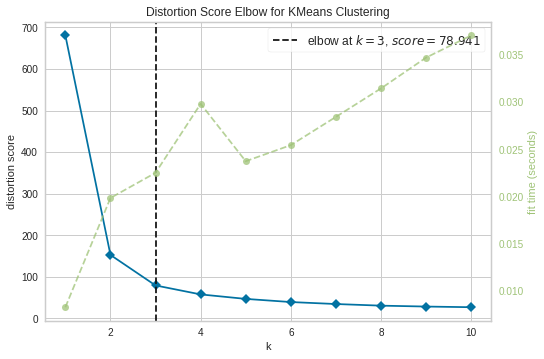

In [51]:
## Elbow method

model = KMeans(random_state = 10)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,11), timings= True)
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

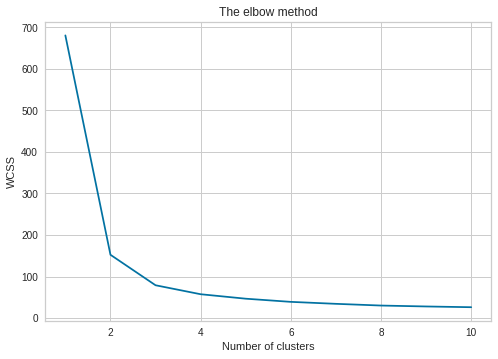

In [52]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

# Gap Statistic method

Optimal number of clusters based on gap statistic: [10.0]


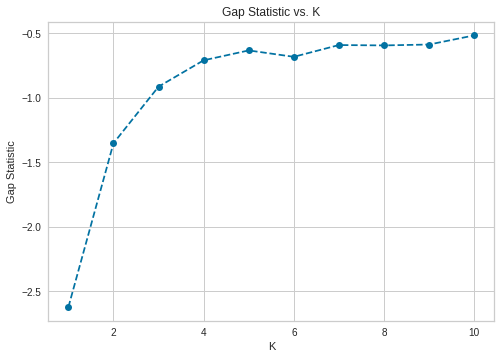

In [53]:
# Gap Statistic for K means


def optimalK(data, nrefs=1, maxClusters=11):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)

        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k, random_state =10)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)

score_g, df = optimalK(x, nrefs=2, maxClusters=11)

plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.title('Gap Statistic vs. K');

df2 = df[df.gap == df.gap.max()]
print('Optimal number of clusters based on gap statistic:', df2['clusterCount'].tolist())

# Silhouette method

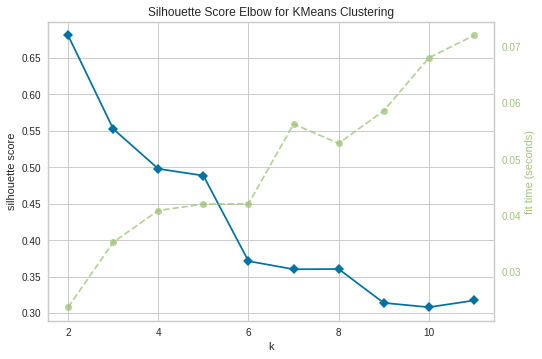

Optimal number of clusters based on silhouette score: [2]


In [54]:
# Silhouette Score for K means

# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state =10)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,12),metric='silhouette', timings= True, locate_elbow=False)
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on silhouette score:', df4['centers'].tolist())

# Calinski method

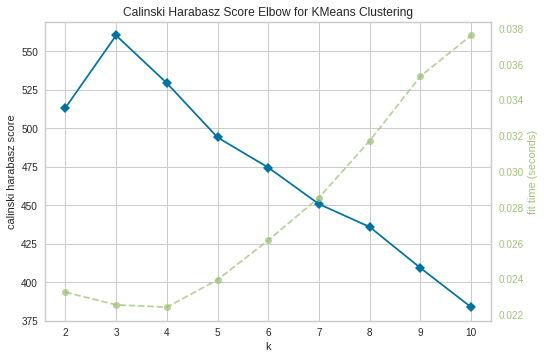

Optimal number of clusters based on calinski harabasz: [3]


In [55]:
# Calinski Harabasz Score for K means

# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state =10)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,11),metric='calinski_harabasz', timings= True, locate_elbow=False)
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on calinski harabasz:', df4['centers'].tolist())

# Davies Bouldin

Optimal number of clusters based on DB score: [2]


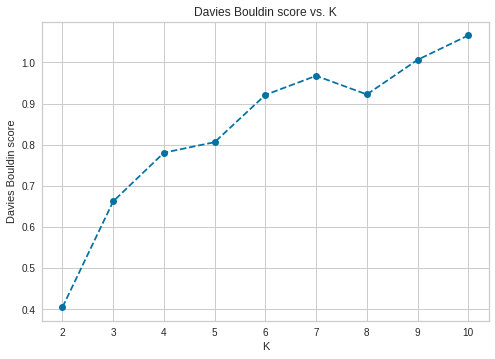

In [56]:
# Davies Bouldin score for K means

from sklearn.metrics import davies_bouldin_score 

def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center,random_state =10)

    # Then fit the model to your data using the fit method
    model = kmeans.fit_predict(x)
    
    # Calculate Silhoutte Score

    score = davies_bouldin_score(x, model)
    
    return score

scores = []
centers = list(range(2,11))

for center in centers:
    scores.append(get_kmeans_score(x, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');


df3 = pd.DataFrame(centers,columns=['centers'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.min()]
print('Optimal number of clusters based on DB score:', df4['centers'].tolist())

In [57]:
# K means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
# Fit K-Means
kmeans_1 = KMeans(n_clusters=3, random_state= 10)
# Use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(x)
# Calculate cluster validation metrics
score_kemans_s = silhouette_score(x, kmeans_1.labels_, metric='euclidean')
score_kemans_c = calinski_harabasz_score(x, kmeans_1.labels_)
score_kemans_d = davies_bouldin_score(x, predictions)


print('Silhouette Score: %.4f' % score_kemans_s)
print('Calinski Harabasz Score: %.4f' % score_kemans_c)
print('Davies Bouldin Score: %.4f' % score_kemans_d)

Silhouette Score: 0.5526
Calinski Harabasz Score: 560.3999
Davies Bouldin Score: 0.6623


In [58]:
def gap_stat_kmeans(data = x,nrefs=3,k=3):
    # Gap Stat
    refDisps = np.zeros(nrefs)
    # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
    for i in range(nrefs):

        # Create new random reference set
        randomReference = np.random.random_sample(size=x.shape)

        # Fit to it
        km = KMeans(k, random_state =10)
        km.fit(randomReference)

        refDisp = km.inertia_
        refDisps[i] = refDisp

    # Fit cluster to original data and create dispersion
    km = KMeans(k)
    km.fit(x)

    origDisp = km.inertia_

    # Calculate gap statistic
    score_g = np.log(np.mean(refDisps)) - np.log(origDisp)
    return score_g

score_kemans_g = gap_stat_kmeans(x,3,3)
print('Gap Statistic Score: %.4f' % score_kemans_g)

Gap Statistic Score: -0.8941


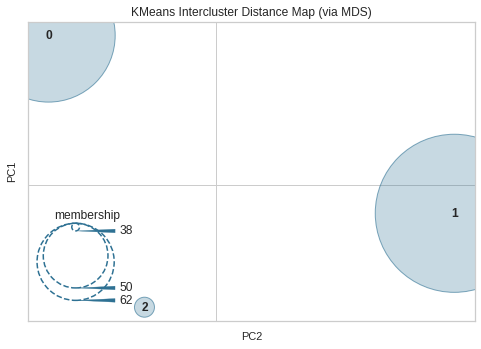

In [59]:
# Inter cluster distance map


from yellowbrick.cluster import InterclusterDistance


# Instantiate the clustering model and visualizer

visualizer = InterclusterDistance(kmeans_1)

visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# 5) Applying the KMeans model on the dataset

In [60]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [61]:
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


# 6) Visualizing the clusters

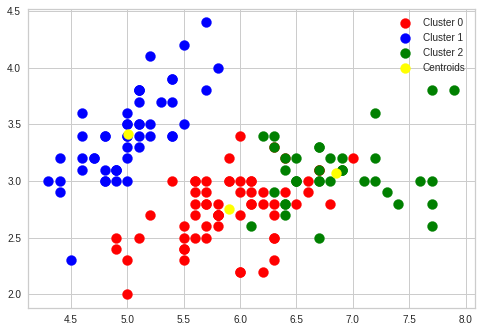

In [62]:
# Visualising the clusters - On the first two columns (SepalLengthCm	SepalWidthCm)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Cluster 2')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [63]:
x = iris_data.iloc[:,[1,2,3,4,5]]
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [64]:
df = px.data.iris()

In [65]:
iris_data['Cluster'] = y_kmeans

In [66]:
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,0
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [67]:
figkmeans = px.scatter_3d(iris_data, x='SepalLengthCm', y='SepalWidthCm', z='PetalWidthCm',
                    color='Cluster', symbol='Species')
figkmeans.show()

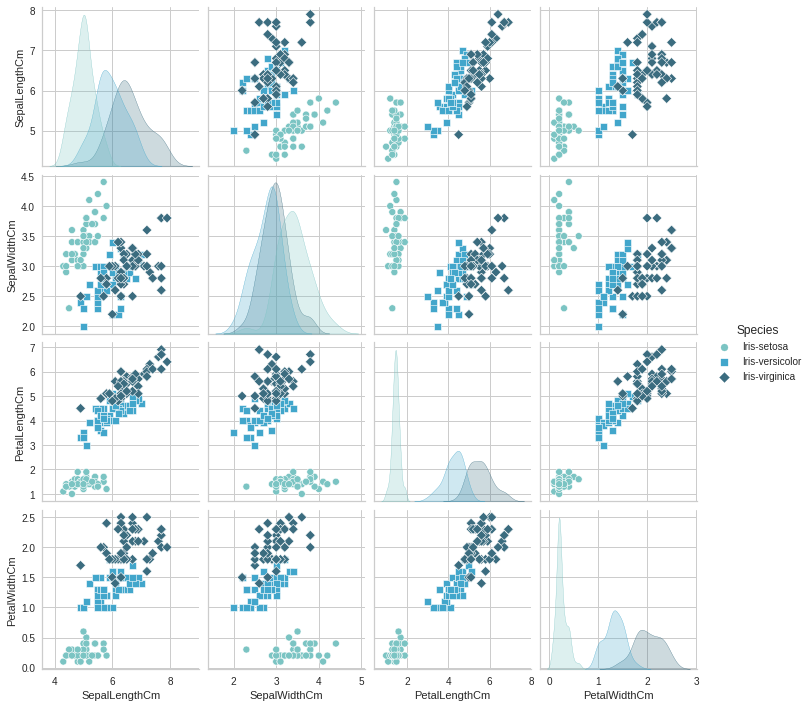

In [68]:
# Scatter plots for the features and histograms
# custom markers also applied
sns.pairplot(x, hue="Species", palette="GnBu_d", markers=["o", "s", "D"])

#Remove the top and right spines from plot
sns.despine()

#show plot
import matplotlib.pyplot as plt
plt.show()

In [69]:
x_cluster= iris_data.iloc[:,[1,2,3,4,6]]
x_cluster

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


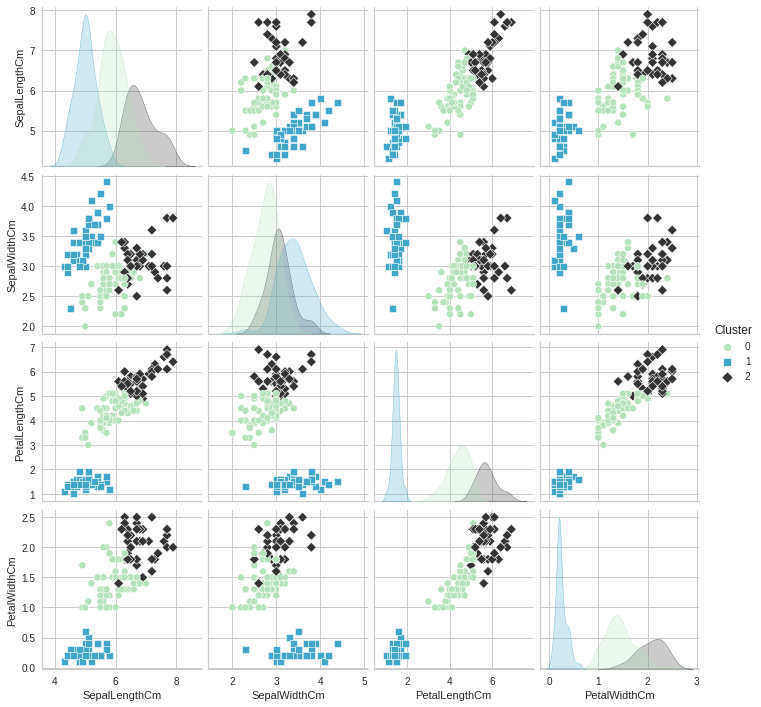

In [70]:
# Scatter plots for the features and histograms
# custom markers also applied
sns.pairplot(x_cluster, hue="Cluster", palette="GnBu_d", markers=["o", "s", "D"])

#Remove the top and right spines from plot
sns.despine()

#show plot
import matplotlib.pyplot as plt
plt.show()

# Evaluating Clusters

In [71]:
iris_data = iris_data.replace('Iris-virginica', 2)
iris_data = iris_data.replace('Iris-setosa', 1)
iris_data = iris_data.replace('Iris-versicolor', 0)


iris_data 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,1.4,0.2,1,1
1,2,4.9,3.0,1.4,0.2,1,1
2,3,4.7,3.2,1.3,0.2,1,1
3,4,4.6,3.1,1.5,0.2,1,1
4,5,5.0,3.6,1.4,0.2,1,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2,2
146,147,6.3,2.5,5.0,1.9,2,0
147,148,6.5,3.0,5.2,2.0,2,2
148,149,6.2,3.4,5.4,2.3,2,2


<Figure size 2160x1080 with 0 Axes>

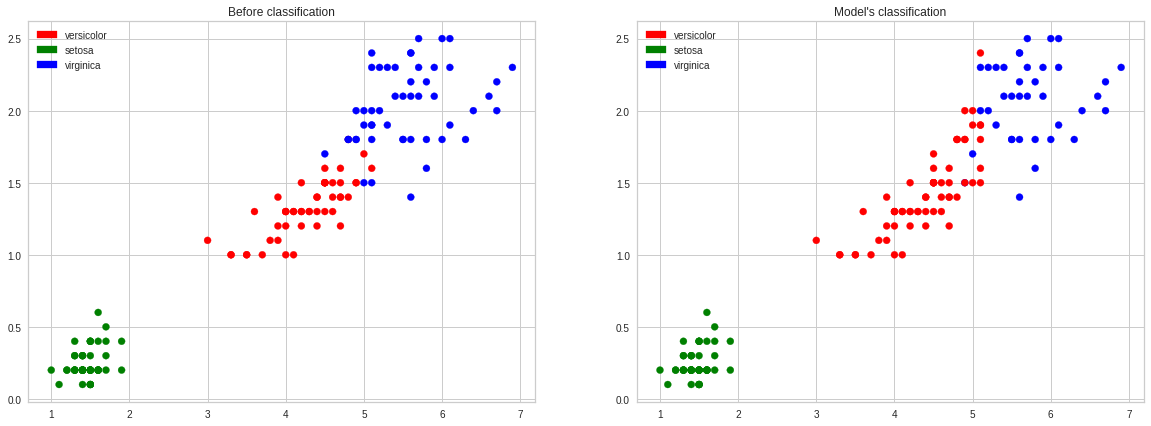

In [72]:
plt.figure(figsize=(30,15))
colors = np.array(['red', 'green', 'blue'])
iris_targets_legend = np.array( [ 0, 1 , 2])
red_patch = mpatches.Patch(color='red', label='versicolor')
green_patch = mpatches.Patch(color='green', label='setosa')
blue_patch = mpatches.Patch(color='blue', label='virginica')

plt.figure(figsize=(20,7))
colors = np.array(['red', 'green', 'blue'])

plt.subplot(1, 2, 1)
plt.scatter(iris_data['PetalLengthCm'], iris_data['PetalWidthCm'], c=colors[iris_data['Species']])
plt.title('Before classification')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1, 2, 2)
plt.scatter(iris_data['PetalLengthCm'], iris_data['PetalWidthCm'], c=colors[iris_data['Cluster']])
plt.title("Model's classification")
plt.legend(handles=[red_patch, green_patch, blue_patch])


In [73]:
# Accuracy
sm.accuracy_score(iris_data['Cluster'], iris_data['Species'])

0.8933333333333333

# Thanks for your attention!